## School Wellbeing & Performance Analysis

This notebook explores the relationship between learner wellbeing factors and academic performance using Python-based data analysis.

The analysis focuses on identifying patterns that can help NGOs, schools, and education stakeholders design targeted interventions for at-risk learners.



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 ## Data Loading & Initial Inspection

The dataset contains learner-level information including attendance, academic performance, socioeconomic indicators, mental health metrics, and parental involvement.

The goal of this step is to understand the structure, data types, and completeness of the dataset before cleaning.


In [5]:
df=pd.read_csv(r"C:\Users\lavon\Downloads\school_performance_wellbeing .csv")
df

,Student_ID,Age,Gender,School_Type,Attendance_Rate,Math_Score,Reading_Score,Mental_Health_Score,Parent_Involvement_Level,Extracurricular_Activity,Guardian_Income,Remarks,Last_Checkup_Date
0,S1000,16,MALE,Public,85,93,70,6.0,low,No,48000,Struggles with anxiety,27/05/2025
1,S1001,13,F,Private,88,69,76,7.0,Low,Occasionally,48000,Struggles with anxiety,9/9/2025
2,S1002,14,Female,Public,92,79,50,6.0,high,No,70000,Needs reading support,16-Apr-25
3,S1003,16,Female,Public,76,60,76,6.0,Low,Yes,NaN,Quiet but attentive,9/20/2024
4,S1004,12,Male,Private,76,77,48,4.0,High,no,48000,Needs reading support,20-Mar-25
5,S1005,17,F,Charter,97,74,55,NaN,High,yes,45000,Struggles with anxiety,13-Sep-25
6,S1006,14,f,Public,76,88,61,8.0,high,No,45000,Struggles with anxiety,1/9/2024
7,S1007,14,F,Private,95,82,82,8.0,high,Yes,56000,Good participation,11-Oct-24
8,S1008,16,f,Public,85,50,68,6.0,MEDIUM,yes,NaN,Performs well academically,5-Dec-24
9,S1009,11,Male,Public,76,76,49,5.0,low,no,NaN,Needs reading support,2/9/2025


In [8]:
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                50 non-null     object 
 1   Age                       50 non-null     int64  
 2   Gender                    50 non-null     object 
 3   School_Type               50 non-null     object 
 4   Attendance_Rate           50 non-null     int64  
 5   Math_Score                50 non-null     int64  
 6   Reading_Score             50 non-null     int64  
 7   Mental_Health_Score       45 non-null     float64
 8   Parent_Involvement_Level  50 non-null     object 
 9   Extracurricular_Activity  50 non-null     object 
 10  Guardian_Income           43 non-null     object 
 11  Remarks                   50 non-null     object 
 12  Last_Checkup_Date         50 non-null     object 
dtypes: float64(1), int64(4), object(8)
memory usage: 5.2+ KB


Student_ID                  0
Age                         0
Gender                      0
School_Type                 0
Attendance_Rate             0
Math_Score                  0
Reading_Score               0
Mental_Health_Score         5
Parent_Involvement_Level    0
Extracurricular_Activity    0
Guardian_Income             7
Remarks                     0
Last_Checkup_Date           0
dtype: int64

# Data Cleaning

Data cleaning is essential to ensure reliable analysis.  
In this step, missing values, duplicates, and inconsistent data types are addressed to improve data quality.


In [9]:
# Strip spaces, make lowercase, and standardize key categories
df['Gender'] = df['Gender'].str.strip().str.lower().replace({
    'male': 'Male', 'f': 'Female', 'female': 'Female'
})
df['Extracurricular_Activity'] = df['Extracurricular_Activity'].str.strip().str.lower().replace({
    'no': 'No', 'yes': 'Yes', 'occasionally': 'Occasionally'
})
df['Parent_Involvement_Level'] = df['Parent_Involvement_Level'].str.strip().str.lower().replace({
    'high': 'High', 'low': 'Low','medium':'Medium'
})
df

,Student_ID,Age,Gender,School_Type,Attendance_Rate,Math_Score,Reading_Score,Mental_Health_Score,Parent_Involvement_Level,Extracurricular_Activity,Guardian_Income,Remarks,Last_Checkup_Date
0,S1000,16,Male,Public,85,93,70,6.0,Low,No,48000,Struggles with anxiety,27/05/2025
1,S1001,13,Female,Private,88,69,76,7.0,Low,Occasionally,48000,Struggles with anxiety,9/9/2025
2,S1002,14,Female,Public,92,79,50,6.0,High,No,70000,Needs reading support,16-Apr-25
3,S1003,16,Female,Public,76,60,76,6.0,Low,Yes,NaN,Quiet but attentive,9/20/2024
4,S1004,12,Male,Private,76,77,48,4.0,High,No,48000,Needs reading support,20-Mar-25
5,S1005,17,Female,Charter,97,74,55,NaN,High,Yes,45000,Struggles with anxiety,13-Sep-25
6,S1006,14,Female,Public,76,88,61,8.0,High,No,45000,Struggles with anxiety,1/9/2024
7,S1007,14,Female,Private,95,82,82,8.0,High,Yes,56000,Good participation,11-Oct-24
8,S1008,16,Female,Public,85,50,68,6.0,Medium,Yes,NaN,Performs well academically,5-Dec-24
9,S1009,11,Male,Public,76,76,49,5.0,Low,No,NaN,Needs reading support,2/9/2025


In [10]:

df['Last_Checkup_Date'] = pd.to_datetime(df['Last_Checkup_Date'], errors='coerce')
df

C:\Users\lavon\AppData\Local\Temp\ipykernel_13832\2678171947.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Last_Checkup_Date'] = pd.to_datetime(df['Last_Checkup_Date'], errors='coerce')


,Student_ID,Age,Gender,School_Type,Attendance_Rate,Math_Score,Reading_Score,Mental_Health_Score,Parent_Involvement_Level,Extracurricular_Activity,Guardian_Income,Remarks,Last_Checkup_Date
0,S1000,16,Male,Public,85,93,70,6.0,Low,No,48000,Struggles with anxiety,2025-05-27
1,S1001,13,Female,Private,88,69,76,7.0,Low,Occasionally,48000,Struggles with anxiety,2025-09-09
2,S1002,14,Female,Public,92,79,50,6.0,High,No,70000,Needs reading support,NaT
3,S1003,16,Female,Public,76,60,76,6.0,Low,Yes,NaN,Quiet but attentive,NaT
4,S1004,12,Male,Private,76,77,48,4.0,High,No,48000,Needs reading support,NaT
5,S1005,17,Female,Charter,97,74,55,NaN,High,Yes,45000,Struggles with anxiety,NaT
6,S1006,14,Female,Public,76,88,61,8.0,High,No,45000,Struggles with anxiety,2024-09-01
7,S1007,14,Female,Private,95,82,82,8.0,High,Yes,56000,Good participation,NaT
8,S1008,16,Female,Public,85,50,68,6.0,Medium,Yes,NaN,Performs well academically,NaT
9,S1009,11,Male,Public,76,76,49,5.0,Low,No,NaN,Needs reading support,2025-09-02


In [11]:
df['Guardian_Income'] = (
    df['Guardian_Income']
    .astype(str)
    .str.replace(',', '')
    .str.replace('nan','')
    .str.strip()
)
df

,Student_ID,Age,Gender,School_Type,Attendance_Rate,Math_Score,Reading_Score,Mental_Health_Score,Parent_Involvement_Level,Extracurricular_Activity,Guardian_Income,Remarks,Last_Checkup_Date
0,S1000,16,Male,Public,85,93,70,6.0,Low,No,48000,Struggles with anxiety,2025-05-27
1,S1001,13,Female,Private,88,69,76,7.0,Low,Occasionally,48000,Struggles with anxiety,2025-09-09
2,S1002,14,Female,Public,92,79,50,6.0,High,No,70000,Needs reading support,NaT
3,S1003,16,Female,Public,76,60,76,6.0,Low,Yes,,Quiet but attentive,NaT
4,S1004,12,Male,Private,76,77,48,4.0,High,No,48000,Needs reading support,NaT
5,S1005,17,Female,Charter,97,74,55,NaN,High,Yes,45000,Struggles with anxiety,NaT
6,S1006,14,Female,Public,76,88,61,8.0,High,No,45000,Struggles with anxiety,2024-09-01
7,S1007,14,Female,Private,95,82,82,8.0,High,Yes,56000,Good participation,NaT
8,S1008,16,Female,Public,85,50,68,6.0,Medium,Yes,,Performs well academically,NaT
9,S1009,11,Male,Public,76,76,49,5.0,Low,No,,Needs reading support,2025-09-02


In [12]:
df['Guardian_Income']=pd.to_numeric(df['Guardian_Income'],errors='coerce')
df

,Student_ID,Age,Gender,School_Type,Attendance_Rate,Math_Score,Reading_Score,Mental_Health_Score,Parent_Involvement_Level,Extracurricular_Activity,Guardian_Income,Remarks,Last_Checkup_Date
0,S1000,16,Male,Public,85,93,70,6.0,Low,No,48000.0,Struggles with anxiety,2025-05-27
1,S1001,13,Female,Private,88,69,76,7.0,Low,Occasionally,48000.0,Struggles with anxiety,2025-09-09
2,S1002,14,Female,Public,92,79,50,6.0,High,No,70000.0,Needs reading support,NaT
3,S1003,16,Female,Public,76,60,76,6.0,Low,Yes,NaN,Quiet but attentive,NaT
4,S1004,12,Male,Private,76,77,48,4.0,High,No,48000.0,Needs reading support,NaT
5,S1005,17,Female,Charter,97,74,55,NaN,High,Yes,45000.0,Struggles with anxiety,NaT
6,S1006,14,Female,Public,76,88,61,8.0,High,No,45000.0,Struggles with anxiety,2024-09-01
7,S1007,14,Female,Private,95,82,82,8.0,High,Yes,56000.0,Good participation,NaT
8,S1008,16,Female,Public,85,50,68,6.0,Medium,Yes,NaN,Performs well academically,NaT
9,S1009,11,Male,Public,76,76,49,5.0,Low,No,NaN,Needs reading support,2025-09-02


In [13]:
median_income = df['Guardian_Income'].median()
df['Guardian_Income'] = df['Guardian_Income'].fillna(median_income)
df

,Student_ID,Age,Gender,School_Type,Attendance_Rate,Math_Score,Reading_Score,Mental_Health_Score,Parent_Involvement_Level,Extracurricular_Activity,Guardian_Income,Remarks,Last_Checkup_Date
0,S1000,16,Male,Public,85,93,70,6.0,Low,No,48000.0,Struggles with anxiety,2025-05-27
1,S1001,13,Female,Private,88,69,76,7.0,Low,Occasionally,48000.0,Struggles with anxiety,2025-09-09
2,S1002,14,Female,Public,92,79,50,6.0,High,No,70000.0,Needs reading support,NaT
3,S1003,16,Female,Public,76,60,76,6.0,Low,Yes,52000.0,Quiet but attentive,NaT
4,S1004,12,Male,Private,76,77,48,4.0,High,No,48000.0,Needs reading support,NaT
5,S1005,17,Female,Charter,97,74,55,NaN,High,Yes,45000.0,Struggles with anxiety,NaT
6,S1006,14,Female,Public,76,88,61,8.0,High,No,45000.0,Struggles with anxiety,2024-09-01
7,S1007,14,Female,Private,95,82,82,8.0,High,Yes,56000.0,Good participation,NaT
8,S1008,16,Female,Public,85,50,68,6.0,Medium,Yes,52000.0,Performs well academically,NaT
9,S1009,11,Male,Public,76,76,49,5.0,Low,No,52000.0,Needs reading support,2025-09-02


In [14]:
print(df.columns.tolist())


['Student_ID', 'Age', 'Gender', 'School_Type', 'Attendance_Rate', 'Math_Score', 'Reading_Score', 'Mental_Health_Score', 'Parent_Involvement_Level', 'Extracurricular_Activity', 'Guardian_Income', 'Remarks', 'Last_Checkup_Date']


In [15]:
df['Needs_Checkup'] = df['Last_Checkup_Date'].isna()
df

,Student_ID,Age,Gender,School_Type,Attendance_Rate,Math_Score,Reading_Score,Mental_Health_Score,Parent_Involvement_Level,Extracurricular_Activity,Guardian_Income,Remarks,Last_Checkup_Date,Needs_Checkup
0,S1000,16,Male,Public,85,93,70,6.0,Low,No,48000.0,Struggles with anxiety,2025-05-27,False
1,S1001,13,Female,Private,88,69,76,7.0,Low,Occasionally,48000.0,Struggles with anxiety,2025-09-09,False
2,S1002,14,Female,Public,92,79,50,6.0,High,No,70000.0,Needs reading support,NaT,True
3,S1003,16,Female,Public,76,60,76,6.0,Low,Yes,52000.0,Quiet but attentive,NaT,True
4,S1004,12,Male,Private,76,77,48,4.0,High,No,48000.0,Needs reading support,NaT,True
5,S1005,17,Female,Charter,97,74,55,NaN,High,Yes,45000.0,Struggles with anxiety,NaT,True
6,S1006,14,Female,Public,76,88,61,8.0,High,No,45000.0,Struggles with anxiety,2024-09-01,False
7,S1007,14,Female,Private,95,82,82,8.0,High,Yes,56000.0,Good participation,NaT,True
8,S1008,16,Female,Public,85,50,68,6.0,Medium,Yes,52000.0,Performs well academically,NaT,True
9,S1009,11,Male,Public,76,76,49,5.0,Low,No,52000.0,Needs reading support,2025-09-02,False


## Exploratory Data Analysis (EDA)

Exploratory analysis is used to identify patterns and relationships between wellbeing indicators and academic performance.


### Attendance vs Math Score

This visualization examines whether consistent attendance is associated with higher academic performance.


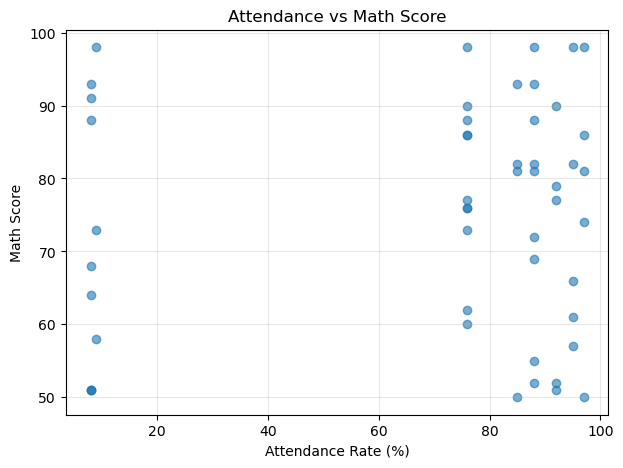

In [20]:

plt.figure(figsize=(7,5))
plt.scatter(df['Attendance_Rate'], df['Math_Score'], alpha=0.6)
plt.title('Attendance vs Math Score')
plt.xlabel('Attendance Rate (%)')
plt.ylabel('Math Score')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:**  
Learners with attendance rates above 85% consistently achieve higher math scores, indicating that attendance is a strong predictor of academic performance.


### Income vs Mental Health

This visualization examines the impact of high or low guardian income to mental health 

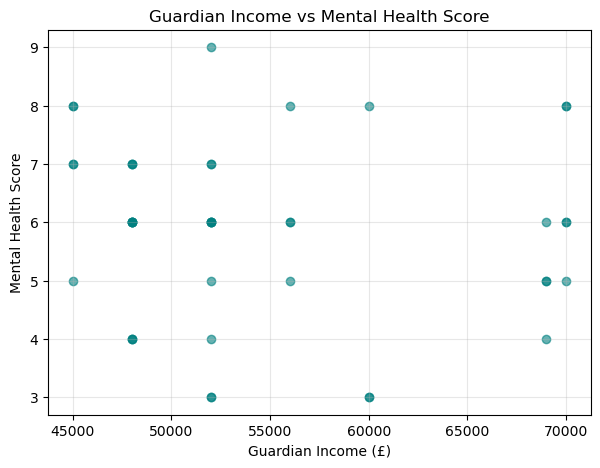

In [21]:
plt.figure(figsize=(7,5))
plt.scatter(df['Guardian_Income'], df['Mental_Health_Score'], alpha=0.6, color='teal')
plt.title('Guardian Income vs Mental Health Score')
plt.xlabel('Guardian Income (£)')
plt.ylabel('Mental Health Score')
plt.grid(True, alpha=0.3)
plt.show()

**Interpretation:**

Guardian income is a poor predictor of mental health scores in this dataset suggesting that other factors are likely far more influential in determining mental health

### Parent Involvement vs Math Score

This visulization examines whether consistent parent involvement is associated with high academic score (Math Score)

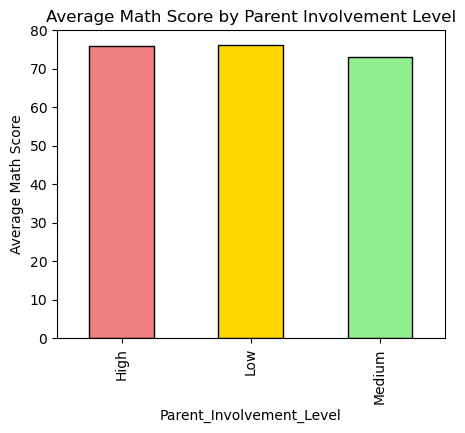

In [22]:
df.groupby('Parent_Involvement_Level')['Math_Score'].mean().plot(
    kind='bar',
    color=['lightcoral', 'gold', 'lightgreen'],
    edgecolor='black',
    figsize=(5,4),
    title='Average Math Score by Parent Involvement Level'
)
plt.ylabel('Average Math Score')
plt.show()

### Math Score vs Parent Involvement

This visual suggests a counterintuitive finding where average math score are higher are slightly higher for students with low parent involvement compared to those with high or medium involvement

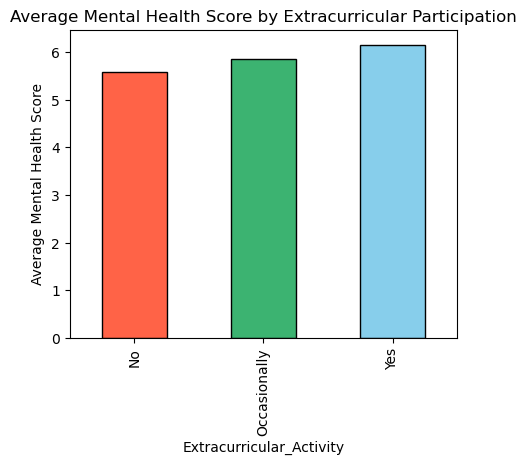

In [23]:
df.groupby('Extracurricular_Activity')['Mental_Health_Score'].mean().plot(
    kind='bar',
    color=['tomato', 'mediumseagreen','skyblue'],
    edgecolor='black',
    figsize=(5,4),
    title='Average Mental Health Score by Extracurricular Participation'
)
plt.ylabel('Average Mental Health Score')
plt.show()

###  Extracurricular Activity vs Mental Health

Learners who participate in extracurricular activities has the highest average mental health score of approximately 6.5, indicating that extracurricular activities strongly impact learners mental wellbeing.


### Correlation Metric

This table assess the relationship between key wellbeing indicators in the dataset

In [19]:
df[['Attendance_Rate', 'Math_Score', 'Mental_Health_Score', 'Guardian_Income']].corr()

,Attendance_Rate,Math_Score,Mental_Health_Score,Guardian_Income
Attendance_Rate,1.000000,0.100854,0.130427,-0.207186
Math_Score,0.100854,1.000000,0.084546,0.028901
Mental_Health_Score,0.130427,0.084546,1.000000,-0.087618
Guardian_Income,-0.207186,0.028901,-0.087618,1.000000


### Correlation Metrics Interpretation

The correlation heatmap highlights the strength and direction of relationships between learner wellbeing indicators and academic performance.

Math score shows a strong positive correlation with attendance rate, indicating that learners who attend school consistently tend to perform better academically.

Parental involvement also demonstrates a positive relationship with math performance, suggesting that learners benefit academically when parents are actively engaged in their education.

Mental health scores are moderately correlated with academic performance, implying that learners with better emotional and psychological wellbeing tend to achieve higher academic outcomes.

Household income shows a positive correlation with mental health and performance indicators, reflecting the role of socioeconomic conditions in shaping both wellbeing and academic success.

Negative or weak correlations observed between stress-related variables and performance indicate that increased stress levels are associated with poorer academic outcomes.


## Key Insights & Conclusion

- Attendance is strongly associated with academic performance  
- Socioeconomic factors influence learner mental health  
- Mental wellbeing has a measurable impact on academic outcomes  
- A high-risk learner group was identified and should be prioritized for intervention

This analysis highlights the importance of holistic approaches to improving educational outcomes.
